In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import pandas as pd
import nltk
from nltk import ngrams
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('Fortnite Statistics.csv')
print(df.columns)
print('Dataframe shape is ', df.shape)
df.dtypes
df

Index(['Date', 'Time of Day', 'Placed', 'Mental State', 'Eliminations',
       'Assists', 'Revives', 'Accuracy', 'Hits', 'Head Shots',
       'Distance Traveled', 'Materials Gathered', 'Materials Used',
       'Damage Taken', 'Damage to Players', 'Damage to Structures'],
      dtype='object')
Dataframe shape is  (87, 16)


,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23%,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30%,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30%,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18%,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58%,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,17-Apr,12:00 AM,2,high,8,2,0,31%,97,8,3770.00,1750,400,576,1492,4593
83,17-Apr,12:00 AM,24,high,4,0,0,20%,12,4,222.54,94,0,96,478,2262
84,17-Apr,1:00 PM,30,sober,1,2,0,28%,40,4,267.00,78,30,148,375,1196
85,17-Apr,2:00 PM,18,sober,3,2,1,26%,25,3,954.43,370,60,354,475,1168


In [5]:
df = pd.read_csv('Fortnite Statistics.csv')
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype(float)
le = LabelEncoder()
df['Time of Day'] = le.fit_transform(df['Time of Day'])
df['Mental State'] = le.fit_transform(df['Mental State'])
df = df.drop('Date', axis = 1, inplace = False)
df_extended = df.fillna(df.mean())
scaler = MinMaxScaler()
for column in df.columns:
    if column != 'Mental State':
        df[column] = scaler.fit_transform((df[column]).array.reshape(-1, 1))
df

,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,0.750000,0.400000,1,0.250,0.000000,0.00,0.220930,0.125000,0.060606,0.057004,0.006662,0.011494,0.384498,0.187284,0.024985
1,0.750000,0.676923,1,0.125,0.333333,0.00,0.302326,0.173077,0.030303,0.085290,0.040973,0.017241,0.346505,0.265377,0.046104
2,0.750000,0.569231,0,0.375,0.000000,0.00,0.302326,0.298077,0.030303,0.132805,0.023651,0.034483,0.238602,0.181064,0.052322
3,0.833333,0.446154,0,0.125,0.500000,0.00,0.162791,0.173077,0.030303,0.156749,0.081279,0.005747,0.332827,0.186593,0.254944
4,0.833333,0.230769,0,0.375,0.166667,0.25,0.627907,0.394231,0.545455,0.252612,0.194537,0.086207,0.525836,0.420180,0.106157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.166667,0.015385,0,1.000,0.333333,0.00,0.313953,0.923077,0.242424,0.844669,0.582945,0.229885,0.846505,0.989634,0.247493
83,0.166667,0.353846,0,0.500,0.000000,0.00,0.186047,0.105769,0.121212,0.046077,0.031312,0.000000,0.117021,0.288874,0.116912
84,0.333333,0.446154,1,0.125,0.333333,0.00,0.279070,0.375000,0.121212,0.056086,0.025983,0.017241,0.196049,0.217692,0.057196
85,0.416667,0.261538,1,0.375,0.333333,0.25,0.255814,0.230769,0.090909,0.210838,0.123251,0.034483,0.509119,0.286800,0.055627


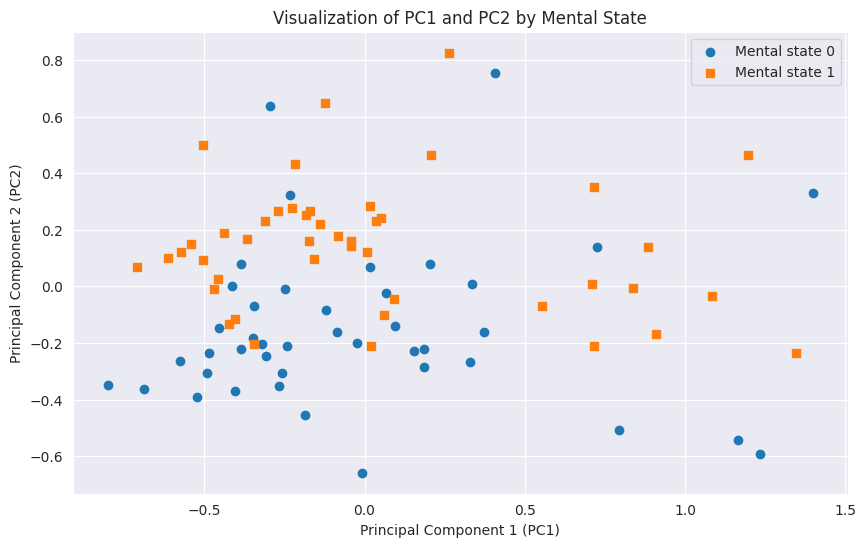

In [9]:
X = df.drop('Mental State', axis=1)  # Features
y = df['Mental State']  # Target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Concatenate the reduced dimensions with the target (Sex)
pca_df['Mental State'] = y.reset_index(drop=True)


# Plot the reduced dimensions
plt.figure(figsize=(10, 6))
markers = {0: 'o', 1: 's'}

# Plot each "Sex" category with a different marker
for mental_state, marker in markers.items():
    subset_df = pca_df[pca_df['Mental State'] == mental_state]
    plt.scatter(subset_df['PC1'], subset_df['PC2'], label=f'Mental state {mental_state}', marker=marker)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.title('Visualization of PC1 and PC2 by Mental State')
plt.show()

Text(0.5, 1.0, 'Visualization of PC1 and PC2 by Mental State')

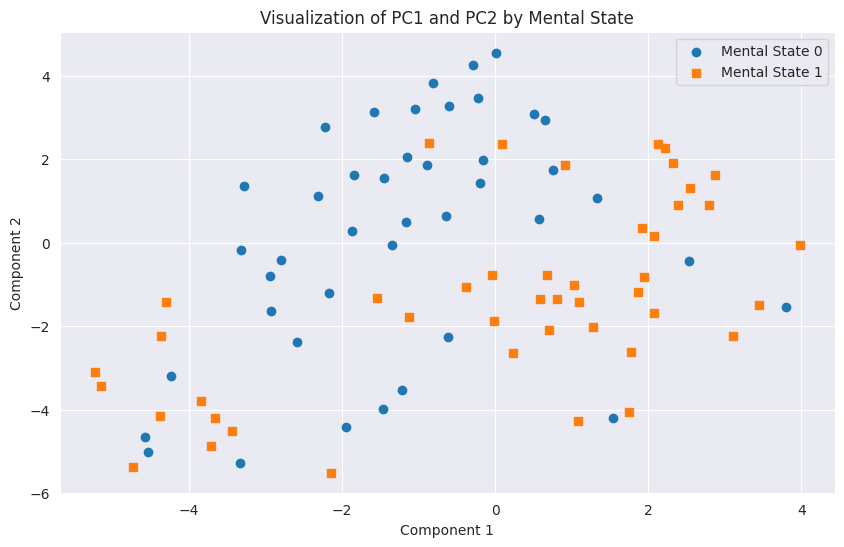

In [14]:
X = df.drop('Mental State', axis=1)  # Features
y = df['Mental State']  # Target

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=0)

# Fit t-SNE to the features and transform them to 2 dimensions
X_tsne = tsne.fit_transform(X)

# Create a new DataFrame for the reduced dimensions
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])

tsne_df['Mental State'] = y.reset_index(drop=True)

plt.figure(figsize=(10, 6))
for mental_state, marker in markers.items():
    subset_df = tsne_df[tsne_df['Mental State'] == mental_state]
    plt.scatter(subset_df['Component 1'], subset_df['Component 2'], label=f'Mental State {mental_state}', marker=marker)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('Visualization of PC1 and PC2 by Mental State')

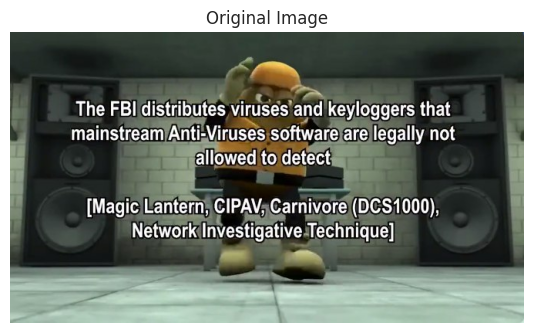

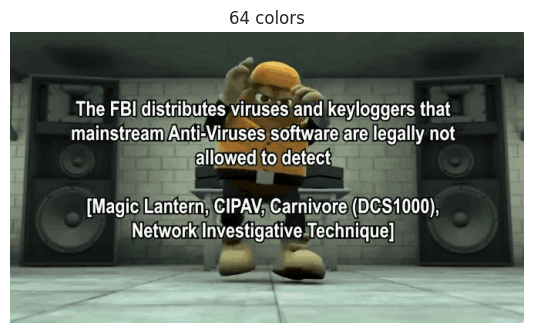

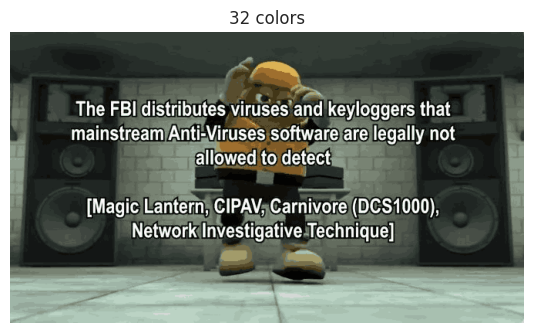

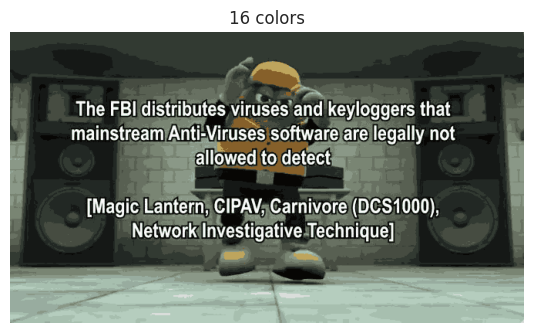

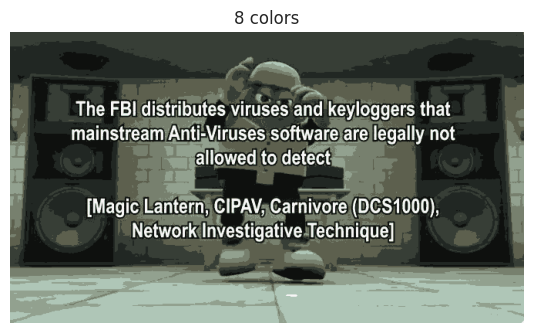

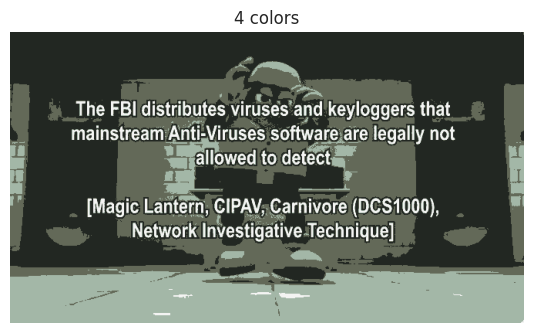

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

def quantize_image(image, n_colors):
    image_array = image.reshape((image.shape[0] * image.shape[1], 3))

    kmeans = KMeans(n_clusters=n_colors, n_init=10).fit(image_array)
    labels = kmeans.predict(image_array)
    quantized_image = kmeans.cluster_centers_[labels].reshape(image.shape).astype(int)

    return quantized_image

image_path = "wdym.jpg"
image = io.imread(image_path)
image = image[:, :, :3]  # видаляємо альфа-канал, якщо він існує
n_colors_list = [64, 32, 16, 8, 4]

# Відображаємо оригінальне зображення
plt.figure(figsize=(image.shape[1]/100, image.shape[0]/100))
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Відображаємо квантовані зображення
for n_colors in n_colors_list:
    result = quantize_image(image, n_colors)
    plt.figure(figsize=(image.shape[1]/100, image.shape[0]/100))
    plt.imshow(result)
    plt.title(f"{n_colors} colors")
    plt.axis('off')
    plt.show()

In [63]:
poems_df = pd.read_csv('Poem_classification - train_data.csv')
poems_df.head()

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...


In [64]:
print("Dataset size: ", len(poems_df))
print("Dataset distinct labels: ", set(poems_df['Genre']))

poems_df = poems_df.dropna()

Dataset size:  841
Dataset distinct labels:  {'Affection', 'Death', 'Environment', 'Music'}


In [65]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

In [66]:
label_encoder = LabelEncoder()
poems_df['Genre'] = label_encoder.fit_transform(poems_df['Genre'])
poems_df

,Genre,Poem
1,3,In the thick brushthey spend the...
2,3,Storms are generous. ...
3,3,—After Ana Mendieta Did you carry around the ...
4,3,for Aja Sherrard at 20The portent may itself ...
5,3,"for Bob Marley, Bavaria, November 1980 Here i..."
...,...,...
836,2,Why make so much of fragmentary blue In here a...
837,2,"Woman, I wish I didn't know your name. What co..."
838,2,"Yonder to the kiosk, beside the creek, Paddle ..."
839,2,You come to fetch me from my work to-night Whe...


In [68]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize and convert to lower case
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

poems_df['Poem'] = poems_df['Poem'].apply(preprocess_text)


# Display the preprocessed dataframe
poems_df

[nltk_data] Downloading package stopwords to /home/c1l1r/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Genre,Poem,poem_preprocessed
1,3,thick brushthey spend hottest part day soaking...,thick brushthey spend hottest part day soaking...
2,3,storms generous something easy surrender sitti...,storms generous something easy surrender sitti...
3,3,ana mendieta carry around matin star hold fore...,ana mendieta carry around matin star hold fore...
4,3,aja sherrard 20the portent may memory wallace ...,aja sherrard 20the portent may memory wallace ...
5,3,bob marley bavaria november 1980 brilliant mor...,bob marley bavaria november 1980 brilliant mor...
...,...,...,...
836,2,make much fragmentary blue bird butterfly flow...,make much fragmentary blue bird butterfly flow...
837,2,woman wish didnt know name could silence house...,woman wish didnt know name could silence house...
838,2,yonder kiosk beside creek paddle swift caque t...,yonder kiosk beside creek paddle swift caque t...
839,2,come fetch work tonight suppers table well see...,come fetch work tonight suppers table well see...


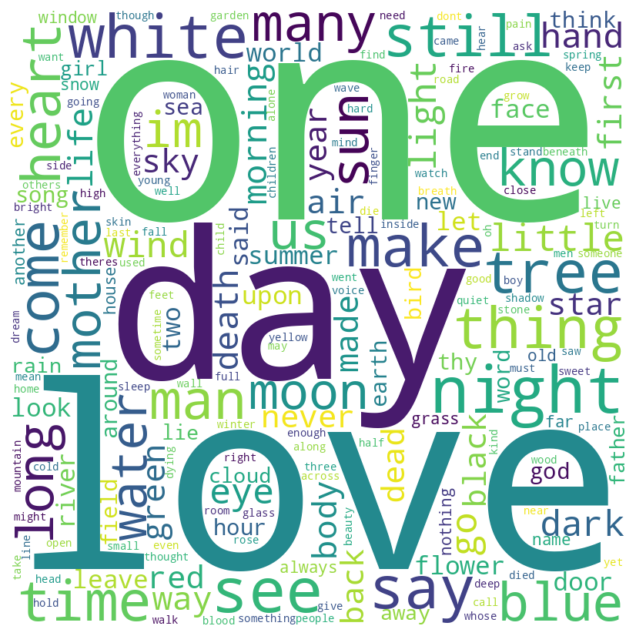

In [69]:
all_poems = ' '.join(poems_df['poem_preprocessed'])
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(all_poems)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

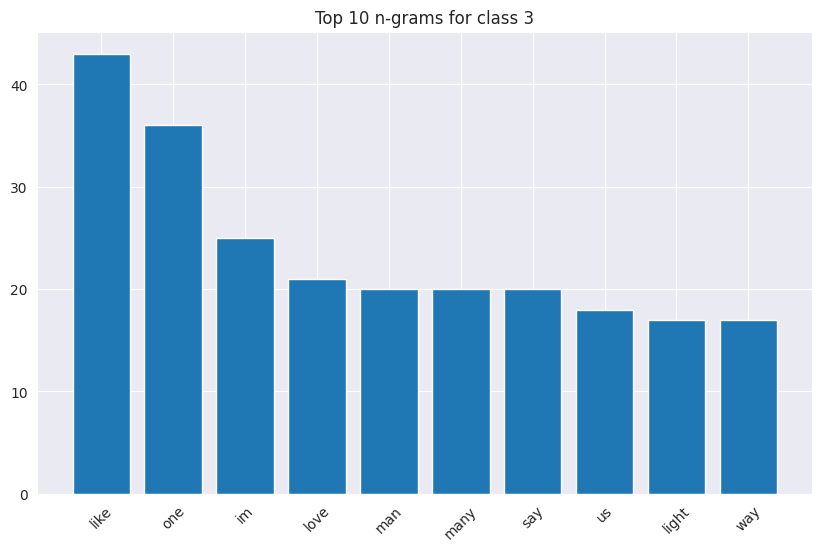

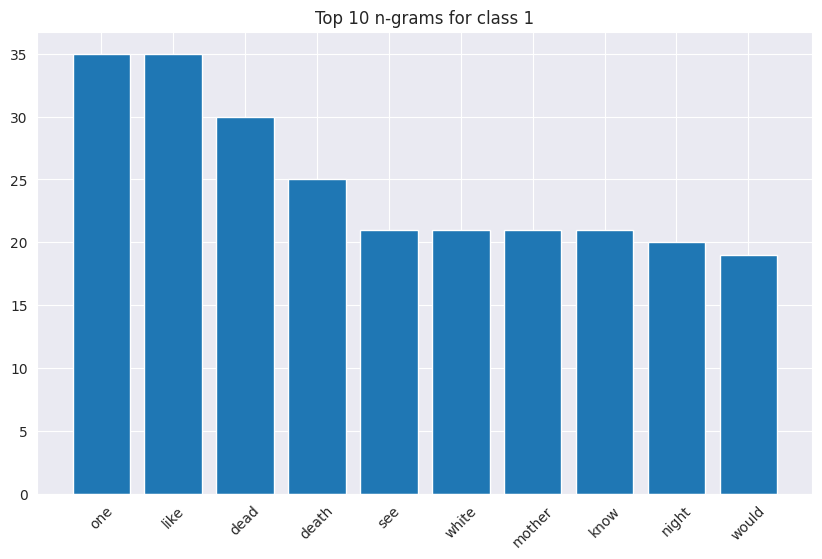

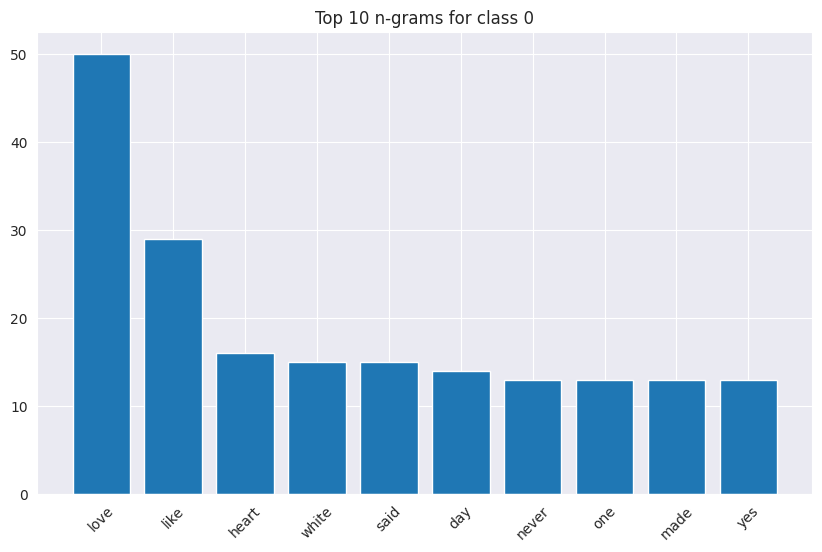

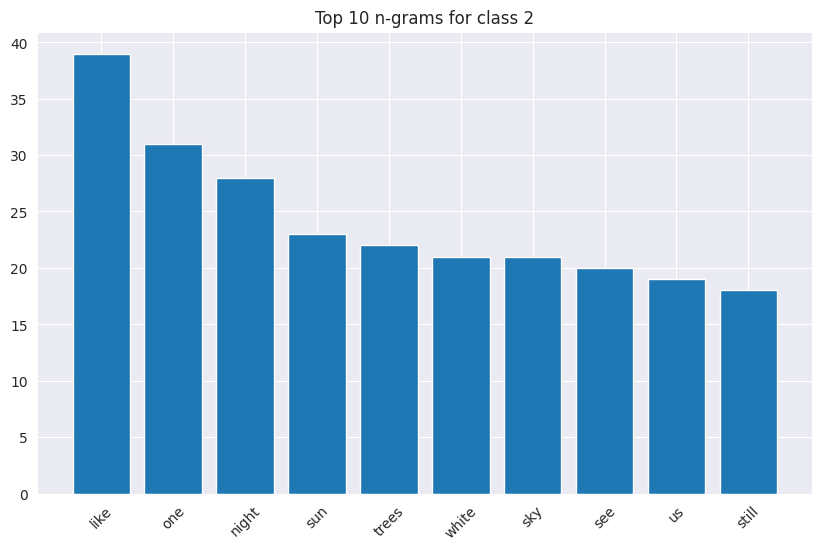

In [70]:
import pandas as pd
import nltk
from nltk import ngrams
import matplotlib.pyplot as plt
from collections import Counter


def get_top_ngrams(corpus, n, top_k):
    tokens = [token for token in corpus.split() if token != '']
    n_grams = ngrams(tokens, n)
    ngram_counts = Counter(n_grams)
    return ngram_counts.most_common(top_k)

# Define the number of top n-grams you want to visualize
top_k = 10
n_value = 1  # set to 2 for bigrams, 3 for trigrams, etc.

classes = poems_df['Genre'].unique()

for class_ in classes:
    subset = poems_df[poems_df['Genre'] == class_]
    all_text = ' '.join(subset['poem_preprocessed'])

    top_ngrams = get_top_ngrams(all_text, n_value, top_k)
    ngram_names = [" ".join(gram[0]) for gram in top_ngrams]
    ngram_counts = [gram[1] for gram in top_ngrams]

    plt.figure(figsize=(10, 6))
    plt.bar(ngram_names, ngram_counts)
    plt.title(f"Top {top_k} n-grams for class {class_}")
    plt.xticks(rotation=45)
    plt.show()

In [72]:
x_train,x_test,y_train,y_test = train_test_split(poems_df.poem_preprocessed, poems_df.Genre, random_state = 0)
x_train

762    softly water ripplesagainst canoes curving sid...
407    someone died im still alive yet dont soul anym...
119    kasr avenue birds lived mud silo millet seeds ...
13     passports curled humid rented roomtravel forge...
158    sometimes starting titleinfuses workwith insur...
                             ...                        
767    surface action daya means tracing dynamic jitt...
193    theres father sleeping every master bedroom cu...
633    thee praise rivers whose white voices pass upo...
563    unfolded folds woman man comes unfolded always...
688    huge vapours brood clifted shorenight oer ocea...
Name: poem_preprocessed, Length: 627, dtype: object

In [74]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

clf = LogisticRegression().fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.29      0.05      0.09        39
           1       0.31      0.28      0.29        61
           2       0.46      0.56      0.50        54
           3       0.33      0.48      0.39        56

    accuracy                           0.36       210
   macro avg       0.35      0.34      0.32       210
weighted avg       0.35      0.36      0.33       210
